In [18]:
import numpy as np 
from pathlib import Path
from src import utils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 15
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# lets grab the coding directions splitted by lick or not lick, and compute the averages per mouse

In [2]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_15', 'blk':'4'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_16', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_01', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_04', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_05', 'blk':'3'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_15', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_10_15', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_10_16', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_23', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_15', 'blk':'3'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_16', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_11_01', 'blk':'3'})
all_sessions = VG11 + VG14 + VG15
all_sessions

[{'mname': 'VG11', 'datexp': '2024_10_15', 'blk': '4'},
 {'mname': 'VG11', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_01', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_04', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_05', 'blk': '3'},
 {'mname': 'VG11', 'datexp': '2024_11_14', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_21', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_23', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_15', 'blk': '3'},
 {'mname': 'VG15', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_11_01', 'blk': '3'}]

In [3]:
lick_response = np.load(f"../data/notz/overall/cod_dir_splitted_with_wo_licks_pertrial_0_125.npy", allow_pickle=True)
print(lick_response.shape, "session, ttype, area, cell_type, lick/nolick")

(16, 4, 4, 2, 2) session, ttype, area, cell_type, lick/nolick


In [13]:
first_training_day = np.arange(1,16,4)
last_training_day = np.arange(2,16,4)
sess_days = [first_training_day, last_training_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
ctypes = ['exc', 'inh']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']

In [6]:
first_day_response = lick_response[first_training_day]
last_day_response = lick_response[last_training_day]
avgs_per_mouse_day1 = np.empty((4, 4, 4, 2, 2, 400))
avgs_per_mouse_day2 = np.empty((4, 4, 4, 2, 2, 400))
for iday, day_response in enumerate([first_day_response, last_day_response]):
    for m in range(4):
        for ttype in range(4):
            for a, area in enumerate(areas):
                for cell_type in range(2):
                    for lick in range(2):
                        if iday == 0:
                            avgs_per_mouse_day1[m, ttype, a, cell_type, lick,:] = np.mean(day_response[m, ttype, a, cell_type, lick], axis=0)
                        else:
                            avgs_per_mouse_day2[m, ttype, a, cell_type, lick,:] = np.mean(day_response[m, ttype, a, cell_type, lick], axis=0)

# plot last day correct vs last day incorrect trials 

## excitatory neurons

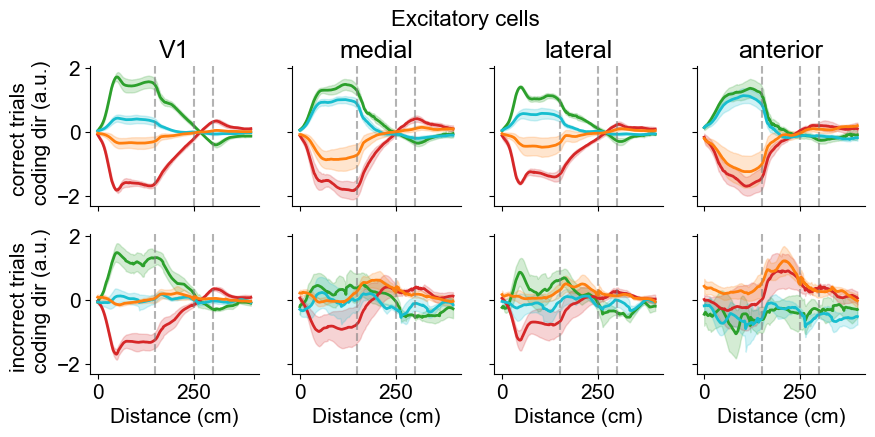

In [9]:
from scipy.stats import sem
last_sess_mean = np.mean(avgs_per_mouse_day2, axis=0)
last_sess_se = sem(avgs_per_mouse_day2, axis=0)
fig, ax = plt.subplots(2, 4, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('Excitatory cells', fontsize=fs_title, y=1.02)
mean_response = last_sess_mean
for ttype in range(4):
    for io, out in enumerate(["correct", "incorrect"]):
        if out == "correct":
            if ttype in [0,2]:
                lick = 0 # reward collected trials
            else:
                lick = 1 #correctly ommited trials
        else:
            if ttype in [0,2]:
                lick = 1
            else:
                lick = 0
        for a, area in enumerate(areas):
            ax[io, a].plot(mean_response[ttype, a, 0, lick], color=trial_type_palette[ttype], linewidth=2)
            ax[io, a].fill_between(np.arange(400), mean_response[ttype, a, 0, lick] - last_sess_se[ttype, a, 0, lick], 
                                   mean_response[ttype, a, 0, lick] + last_sess_se[ttype, a, 0, lick], alpha=0.2, color=trial_type_palette[ttype])
            ax[io, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if io == 0:
                ax[io, a].set_xlabel('')
                ax[io, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[io, a].set_ylabel('correct trials \n coding dir (a.u.)')
            else:
                ax[io, a].set_xlabel('Distance (cm)')
                if a == 0:
                    ax[io, a].set_ylabel('incorrect trials \n coding dir (a.u.)')
        

# Inhibitory neurons

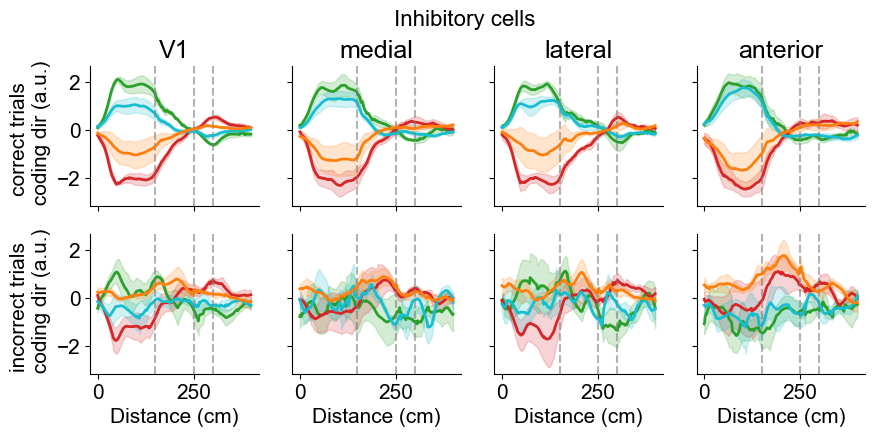

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('Inhibitory cells', fontsize=fs_title, y=1.02)
mean_response = last_sess_mean
for ttype in range(4):
    for io, out in enumerate(["correct", "incorrect"]):
        if out == "correct":
            if ttype in [0,2]:
                lick = 0 # reward collected trials
            else:
                lick = 1 #correctly ommited trials
        else:
            if ttype in [0,2]:
                lick = 1
            else:
                lick = 0
        for a, area in enumerate(areas):
            ax[io, a].plot(mean_response[ttype, a, 1, lick], color=trial_type_palette[ttype], linewidth=2)
            ax[io, a].fill_between(np.arange(400), mean_response[ttype, a, 1, lick] - last_sess_se[ttype, a, 1, lick], 
                                   mean_response[ttype, a, 1, lick] + last_sess_se[ttype, a, 1, lick], alpha=0.2, color=trial_type_palette[ttype])
            ax[io, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if io == 0:
                ax[io, a].set_xlabel('')
                ax[io, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[io, a].set_ylabel('correct trials \n coding dir (a.u.)')
            else:
                ax[io, a].set_xlabel('Distance (cm)')
                if a == 0:
                    ax[io, a].set_ylabel('incorrect trials \n coding dir (a.u.)')

In [81]:
def significance(pval):
    if  pval >= .05:
        sig = ''
    elif pval < .05 and pval >= .01:
        sig = '*'
    elif pval < .01 and pval >= .001:
        sig = '**'
    elif pval < .001 and pval >= .0001:
        sig = '***'
    else:
        sig = '****'
    return sig

# lets compute the average coding dir (regardless lick or not lick) for each session and each day

In [37]:
avgs_coding_dirs = np.empty((16, 4, 4, 2, 400))
for iss, sess in enumerate(all_sessions):
    name, date, blk, = sess['mname'], sess['datexp'], sess['blk']
    pth = Path(fr"..\data\notz\{name}\{date}\{blk}\cod_dirs_0_125.npy")
    cod_dirs = np.load(pth)
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    for a, _ in enumerate(areas):
        for ctype, _ in enumerate(ctypes):
            for i_t, (ttype, trials) in enumerate(m1.trial_dict.items()):
                if ttype in ['rewarded', 'non_rewarded']:
                    t = trials[1::2] # only use test trials
                    avgs_coding_dirs[iss, i_t, a, ctype, :] = cod_dirs[t, a, ctype, :].mean(0)
                else:
                    avgs_coding_dirs[iss, i_t, a, ctype, :] = cod_dirs[trials, a, ctype, :].mean(0)
    clear_output(wait=True)
np.save(r"..\data\notz\overall\avgs_coding_dirs.npy", avgs_coding_dirs)
print("Done...")
print(avgs_coding_dirs.shape, "session, ttype, area, cell_type, positions")

Done...
(16, 4, 4, 2, 400) session, ttype, area, cell_type, positions


In [39]:
rew_gis = np.empty((16,4,2))
nrew_gis = np.empty((16,4,2))
for day in range(avgs_coding_dirs.shape[0]):
    cd_selection = avgs_coding_dirs[day,:,:,:,:125]
    cd_selection = cd_selection.mean(-1)
    for cell_type in range(2):
        for area in range(4):
            red_cyan = np.abs(cd_selection[1,area, cell_type] - cd_selection[2, area, cell_type])
            green_cyan = np.abs(cd_selection[0,area, cell_type] - cd_selection[2,area, cell_type])
            red_orange = np.abs(cd_selection[1,area, cell_type] - cd_selection[3, area, cell_type])
            green_orange = np.abs(cd_selection[0, area, cell_type] - cd_selection[3, area, cell_type])
            green_red  = np.abs(cd_selection[0, area, cell_type] - cd_selection[1, area, cell_type])
            rew_gis[day, area, cell_type] = (red_cyan - green_cyan) / green_red
            nrew_gis[day, area, cell_type] = (red_orange - green_orange) / green_red

In [40]:
gis = np.empty((16,4,2))
for day in range(avgs_coding_dirs.shape[0]):
    cd_selection = avgs_coding_dirs[day,:,:,:,:125]
    cd_selection = cd_selection.mean(-1)
    for cell_type in range(2):
        for area in range(4):
            cyan_orange = np.abs(cd_selection[2,area, cell_type] - cd_selection[3, area, cell_type])
            green_red = np.abs(cd_selection[0,area, cell_type] - cd_selection[1, area, cell_type])
            gis[day, area, cell_type] = cyan_orange/green_red

In [41]:
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
sess_days = np.concatenate(np.array([second_day, third_day]))

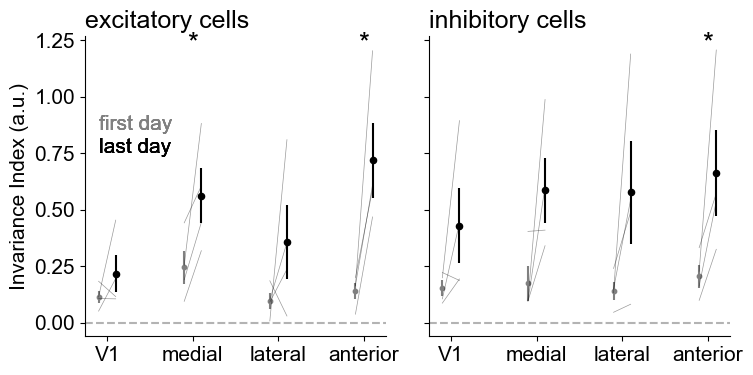

In [82]:
from scipy.stats import ttest_rel, sem
gis_sess = gis[sess_days]
fig, ax = plt.subplots(1, 2, figsize=(7.8,4), sharex=True, sharey=True)
for a in range(4):
    for ctp in range(2):
        day_one_r = gis_sess[:4,a, ctp]
        day_two_r = gis_sess[4:,a, ctp]
        mean_day_one = np.mean(day_one_r, axis=0)
        mean_day_two = np.mean(day_two_r, axis=0)
        sem_day_one = sem(day_one_r, axis=0)
        sem_day_two = sem(day_two_r, axis=0)
        ax[ctp].scatter(a-.1, mean_day_one, color='gray', alpha=1, s=10)
        ax[ctp].scatter(a+.1, mean_day_two, color='k', alpha=1, s=20)
        ax[ctp].errorbar(a-.1, mean_day_one, yerr=sem_day_one, color='gray', alpha=1)
        ax[ctp].errorbar(a+.1, mean_day_two, yerr=sem_day_two, color='k', alpha=1)
        ax[ctp].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
        
        ax[ctp].axhline(y=0, color='gray', linestyle='--', alpha=0.2)
        if ctp == 0:
            ax[ctp].set_ylabel('Invariance Index (a.u.)')
            ax[ctp].set_yticks([0,.25,.5,.75, 1, 1.25])
            ax[ctp].text(-.1, .85, "first day", ha='left', color='gray')
            ax[ctp].text(-.1, .75, "last day", ha='left', color='k')
            ax[ctp].set_title("excitatory cells")
        else:
            ax[ctp].set_title("inhibitory cells")
        t, p = ttest_rel(day_two_r, day_one_r, alternative='greater')
        p_t = significance(p)
        ax[ctp].text(a, 1.2, p_t, ha='center', color='k', fontsize=20)

        # connect lines between every sample point and each day
        for m in range(4):
            ax[ctp].plot([a-.1, a+.1], [day_one_r[m], day_two_r[m]], color='k', linewidth=.5, alpha=0.4)
plt.tight_layout()
plt.savefig("../results/gis_day1_day2.svg", bbox_inches='tight')

3.0164767811877966 0.028459035977569973


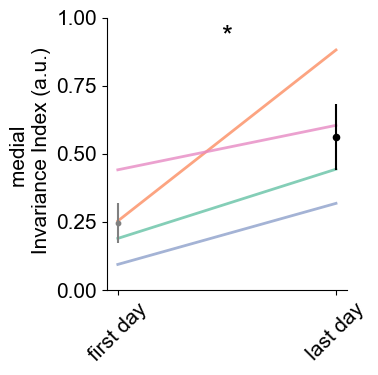

In [49]:
from scipy.stats import ttest_rel, sem
gis_sess = gis[sess_days]
fig, ax = plt.subplots(1,1, figsize=(4, 4), sharey=True)
day_one_r = gis_sess[:4, 1, 0]
day_two_r = gis_sess[4:, 1, 0]
mean_day_one = np.mean(day_one_r, axis=0)
mean_day_two = np.mean(day_two_r, axis=0)
sem_day_one = sem(day_one_r, axis=0)
sem_day_two = sem(day_two_r, axis=0)
ax.scatter(-.1, mean_day_one, color='gray', alpha=1, s=10)
ax.scatter(.1, mean_day_two, color='k', alpha=1, s=20)
ax.errorbar(-.1, mean_day_one, yerr=sem_day_one, color='gray', alpha=1)
ax.errorbar(.1, mean_day_two, yerr=sem_day_two, color='k', alpha=1)
ax.set_xticks([-.1, .1], ['first day', 'last day'], rotation=45)
ax.set_ylabel('medial \n Invariance Index (a.u.)')
ax.set_yticks([0,.25,.5,.75, 1])
ax.set_ylim(0, 1)
#ax.text(, .85, "first day", ha='left', color='gray', fontsize=12)
#ax.text(-.1, .75, "last day", ha='left', color='k', fontsize=12)
t,p = ttest_rel(day_two_r, day_one_r, alternative='greater')
p_t = significance(p)
print(t,p)
ax.text(0, .9, p_t, ha='center', color='k', fontsize=20)

# connect lines between every sample point and each day
mouse_colors = sns.color_palette("Set2", 4)
for m in range(4):
    ax.plot([-.1, +.1], [day_one_r[m], day_two_r[m]], alpha=0.8, color= mouse_colors[m], linewidth=2, zorder=0)
plt.tight_layout()
plt.savefig("../results/gis_day1_day2_medial.svg", bbox_inches='tight')

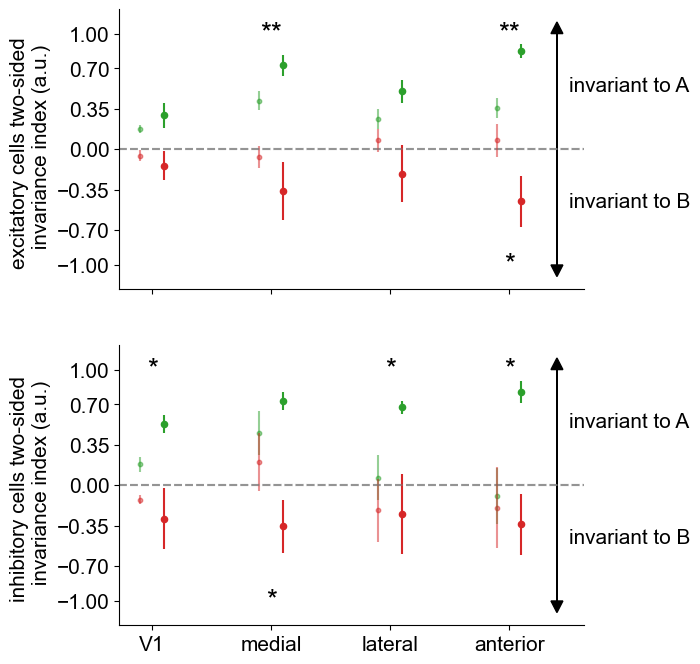

In [83]:
from scipy.stats import ttest_rel, sem
rew_gis_sess = rew_gis[sess_days]
nrew_gis_sess = nrew_gis[sess_days]
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True, sharey=True)
for a in range(4):
    for i_cat, cat_response in enumerate([rew_gis_sess, nrew_gis_sess]):
        if i_cat == 0:
            c = 'tab:green'
        else:
            c = 'tab:red' 
        for ctp in range(2):
            day_one_r = cat_response[:4,a,ctp]
            day_two_r = cat_response[4:,a,ctp]
            mean_day_one = np.mean(day_one_r, axis=0)
            mean_day_two = np.mean(day_two_r, axis=0)
            sem_day_one = sem(day_one_r, axis=0)
            sem_day_two = sem(day_two_r, axis=0)
            ax[ctp].scatter(a-.1, mean_day_one, color=c, alpha=0.5, s=10)
            ax[ctp].scatter(a+.1, mean_day_two, color=c, alpha=1, s=20)
            ax[ctp].errorbar(a-.1, mean_day_one, yerr=sem_day_one, color=c, alpha=0.5)
            ax[ctp].errorbar(a+.1, mean_day_two, yerr=sem_day_two, color=c, alpha=1)
            ax[ctp].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
            ax[ctp].axhline(y=0, color='gray', linestyle='--', alpha=0.2)
            if ctp == 0:
                ax[ctp].set_ylabel('excitatory cells two-sided \n invariance index (a.u.)')
                ax[ctp].set_yticks([-1,-.7,-.35,0,.35,.7,1])
            else:
                ax[ctp].set_ylabel('inhibitory cells two-sided \n invariance index (a.u.)')
            if i_cat == 0:
                t, p = ttest_rel(day_two_r, day_one_r, alternative='greater')
            else:
                t, p = ttest_rel(day_two_r, day_one_r, alternative='less')
            p_t = significance(p)
            if i_cat == 0:
                ax[ctp].text(a, 1, p_t, ha='center', va='center', color='k', fontsize=20)
            else:
                ax[ctp].text(a, -1, p_t, ha='center', va='center', color='k', fontsize=20)
                # add a green arrow from 0 to 1 with a text "generalizes to rewarded"
                # add a red arrow from 0 to -1 with a text "generalizes to non-rewarded"
                # add a gray arrow from 0 to 0 with a text "no generalization"

# add arrows
for ctp in range(2):
    ax[ctp].arrow(3.4, 0, 0, 1, color='k', head_width=0.1, head_length=0.1)
    ax[ctp].text(3.5, .5, "invariant to A", color='k')
    ax[ctp].arrow(3.4, 0, 0, -1, color='k', head_width=0.1, head_length=0.1)
    ax[ctp].text(3.5, -.5, "invariant to B", color='k')
        

# First vs last day coding direction

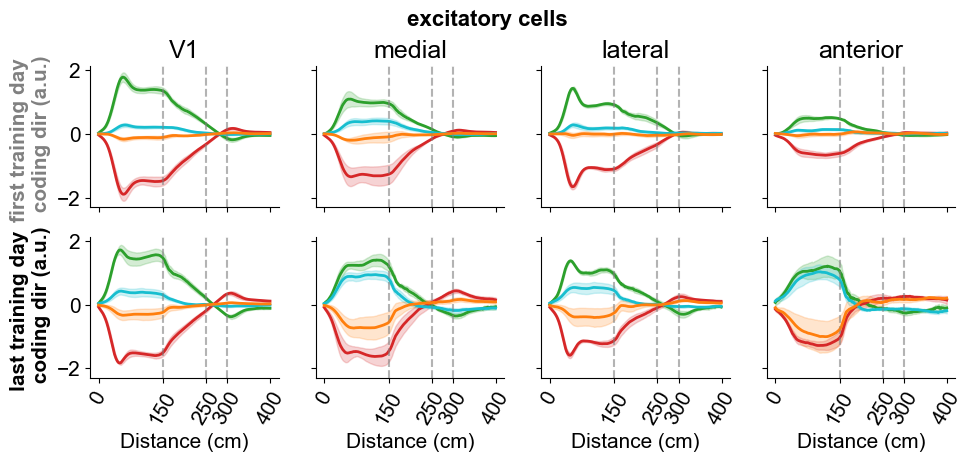

In [64]:
first_sess_mean = np.mean(avgs_coding_dirs[second_day], axis=0)
last_sess_mean = np.mean(avgs_coding_dirs[third_day], axis=0)
fig, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle("excitatory cells", fontsize=fs_title, fontweight='bold', y=.93, ha='center')
for iday, day_response in enumerate([avgs_coding_dirs[second_day], avgs_coding_dirs[third_day]]):
    if iday == 0:
        mean_response = first_sess_mean
        day_response = avgs_coding_dirs[second_day]
    else:
        mean_response = last_sess_mean
        day_response = avgs_coding_dirs[third_day]
    for ttype in range(4):
        for a, area in enumerate(areas):
            ax[iday, a].plot(mean_response[ttype, a, 0], color=trial_type_palette[ttype], linewidth=2)
            ax[iday, a].fill_between(np.arange(400), mean_response[ttype, a, 0] - sem(day_response[:,ttype, a, 0], axis=0),
                                      mean_response[ttype, a, 0] + sem(day_response[:,ttype, a, 0], axis=0), 
                                     color=trial_type_palette[ttype], alpha=0.2)
            ax[iday, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if iday == 0:
                ax[iday, a].set_xlabel('')
                ax[iday, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[iday, a].set_ylabel('first training day \n coding dir (a.u.)', color='gray', fontweight='bold')
            else:
                ax[iday, a].set_xlabel('Distance (cm)')
                ax[iday, a].set_xticks([0, 150, 250, 300, 400])
                #rotate xticks
                for tick in ax[iday, a].get_xticklabels():
                    tick.set_rotation(60)
                if a == 0:
                    ax[iday, a].set_ylabel('last training day \n coding dir (a.u.)', color='k', fontweight='bold')
plt.tight_layout()
plt.savefig("../results/coding_dirs_area_firstvslast.svg", bbox_inches='tight')

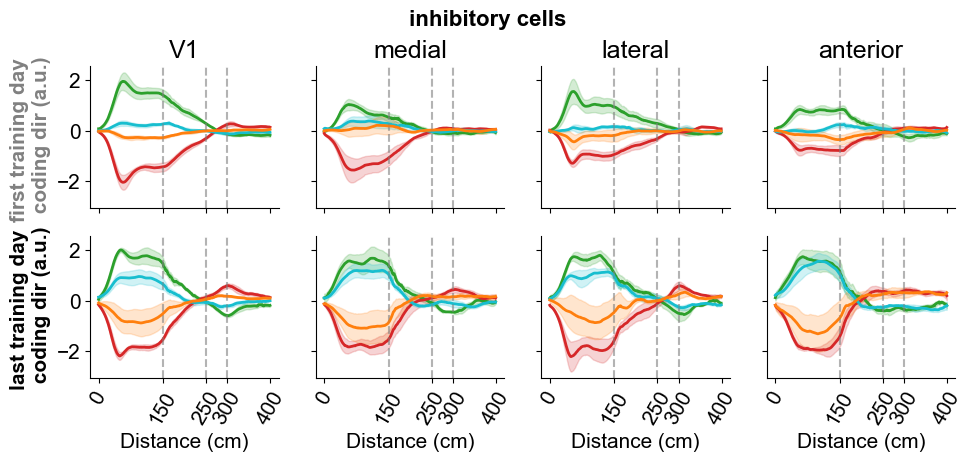

In [65]:
first_sess_mean = np.mean(avgs_coding_dirs[second_day], axis=0)
last_sess_mean = np.mean(avgs_coding_dirs[third_day], axis=0)
fig, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle("inhibitory cells", fontsize=fs_title, fontweight='bold', y=.93, ha='center')
for iday, day_response in enumerate([avgs_coding_dirs[second_day], avgs_coding_dirs[third_day]]):
    if iday == 0:
        mean_response = first_sess_mean
        day_response = avgs_coding_dirs[second_day]
    else:
        mean_response = last_sess_mean
        day_response = avgs_coding_dirs[third_day]
    for ttype in range(4):
        for a, area in enumerate(areas):
            ax[iday, a].plot(mean_response[ttype, a, 1], color=trial_type_palette[ttype], linewidth=2)
            ax[iday, a].fill_between(np.arange(400), mean_response[ttype, a, 1] - sem(day_response[:,ttype, a, 1], axis=0),
                                      mean_response[ttype, a, 1] + sem(day_response[:,ttype, a, 1], axis=0), 
                                     color=trial_type_palette[ttype], alpha=0.2)
            ax[iday, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if iday == 0:
                ax[iday, a].set_xlabel('')
                ax[iday, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[iday, a].set_ylabel('first training day \n coding dir (a.u.)', color='gray', fontweight='bold')
            else:
                ax[iday, a].set_xlabel('Distance (cm)')
                ax[iday, a].set_xticks([0, 150, 250, 300, 400])
                #rotate xticks
                for tick in ax[iday, a].get_xticklabels():
                    tick.set_rotation(60)
                if a == 0:
                    ax[iday, a].set_ylabel('last training day \n coding dir (a.u.)', color='k', fontweight='bold')
plt.tight_layout()